In [ ]:
# Cell A: install required packages & imports (run once)
# Run this cell first in Colab.

# install packages (silent)
!pip install -q psutil matplotlib numpy

# Imports
import time, gc, copy
import matplotlib.pyplot as plt
import numpy as np
import psutil
%matplotlib inline

# helper: measure time + memory (using psutil)
def measure_time_and_memory(func, args=(), kwargs=None):
    """Return (result, time_seconds, memory_MB_change)."""
    if kwargs is None: kwargs = {}
    gc.collect()
    process = psutil.Process()
    mem_before = process.memory_info().rss / (1024*1024)  # MB
    t0 = time.time()
    result = func(*args, **kwargs)
    t1 = time.time()
    gc.collect()
    mem_after = process.memory_info().rss / (1024*1024)   # MB
    return result, (t1 - t0), (mem_after - mem_before)

# set seed
np.random.seed(42)
print("Setup done. Run cells 1..4 next.")


Setup done. Run cells 1..4 next.


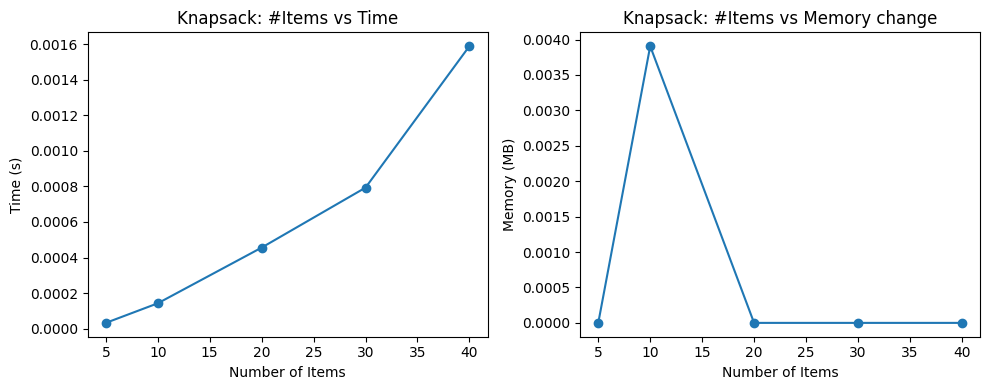

Example Maximum Profit: 8

Note: Time & Space both O(n * capacity). Use 1D DP to reduce space to O(capacity).


In [5]:
# Cell 2: 0/1 Knapsack (Bottom-Up DP)
# Paste and run after Cell A.

import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

def knapsack_2d(weights, values, capacity):
    """
    Standard bottom-up DP (2D).
    weights, values: lists of length n
    capacity: int
    returns: maximum achievable value (int)
    """
    n = len(values)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n+1):
        w_i = weights[i-1]
        v_i = values[i-1]
        for w in range(0, capacity+1):
            if w_i <= w:
                dp[i][w] = max(v_i + dp[i-1][w-w_i], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]
    return dp[n][capacity]

def profile_knapsack(item_counts=[5,10,20,30,40]):
    times = []; mems = []
    for n in item_counts:
        weights = np.random.randint(1, 15, size=n).tolist()
        values  = np.random.randint(5, 100, size=n).tolist()
        capacity = max(1, int(sum(weights) * 0.5))
        _, t, m = measure_time_and_memory(knapsack_2d, args=(deepcopy(weights), deepcopy(values), capacity))
        times.append(t); mems.append(m)
    return item_counts, times, mems

# Run profiling and plot
item_counts, times, mems = profile_knapsack()
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(item_counts, times, marker='o')
plt.title("Knapsack: #Items vs Time")
plt.xlabel("Number of Items"); plt.ylabel("Time (s)")
plt.subplot(1,2,2)
plt.plot(item_counts, mems, marker='o')
plt.title("Knapsack: #Items vs Memory change")
plt.xlabel("Number of Items"); plt.ylabel("Memory (MB)")
plt.tight_layout(); plt.show()

# Example
weights = [2,3,4,5]; values = [3,4,5,8]; capacity = 5
print("Example Maximum Profit:", knapsack_2d(weights, values, capacity))
print("\nNote: Time & Space both O(n * capacity). Use 1D DP to reduce space to O(capacity).")
